In [63]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.neighbors import KNeighborsRegressor

from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

import warnings
warnings.filterwarnings('ignore')

import matplotlib
%matplotlib inline

In [64]:
df= pd.read_csv("energy.csv")
df.head(10)

,Building Type,Square Footage,Number of Occupants,Appliances Used,Average Temperature,Day of Week,Energy Consumption
0,Residential,24563,15,4,28.52,Weekday,2865.57
1,Commercial,27583,56,23,23.07,Weekend,4283.80
2,Commercial,45313,4,44,33.56,Weekday,5067.83
3,Residential,41625,84,17,27.39,Weekend,4624.30
4,Residential,36720,58,47,17.08,Weekday,4820.59
5,Industrial,31207,47,28,22.82,Weekday,5026.23
6,Residential,39227,18,44,23.36,Weekend,4404.56
7,Residential,7814,21,19,27.27,Weekday,2394.37
8,Industrial,20482,24,16,23.00,Weekend,3969.09
9,Industrial,21030,90,35,12.96,Weekday,5136.69


In [65]:
df.isna().sum()

Building Type          0
Square Footage         0
Number of Occupants    0
Appliances Used        0
Average Temperature    0
Day of Week            0
Energy Consumption     0
dtype: int64

In [66]:
df.duplicated().sum()

np.int64(0)

In [67]:
df.columns = [col.replace(" ", "_") for col in df.columns]


In [68]:
df['Energy_Consumption'].value_counts()

Energy_Consumption
2865.57    1
4283.80    1
5067.83    1
4624.30    1
4820.59    1
          ..
3010.81    1
4248.49    1
2843.60    1
3348.39    1
4722.59    1
Name: count, Length: 100, dtype: int64

In [69]:
df.head()

,Building_Type,Square_Footage,Number_of_Occupants,Appliances_Used,Average_Temperature,Day_of_Week,Energy_Consumption
0,Residential,24563,15,4,28.52,Weekday,2865.57
1,Commercial,27583,56,23,23.07,Weekend,4283.80
2,Commercial,45313,4,44,33.56,Weekday,5067.83
3,Residential,41625,84,17,27.39,Weekend,4624.30
4,Residential,36720,58,47,17.08,Weekday,4820.59


In [70]:
df['Day_of_Week'].value_counts()

Day_of_Week
Weekend    56
Weekday    44
Name: count, dtype: int64

In [71]:
df['Day_of_Week'].replace({'Weekend':0, 'Weekday':1}, inplace=True)

<Axes: ylabel='Appliances_Used'>

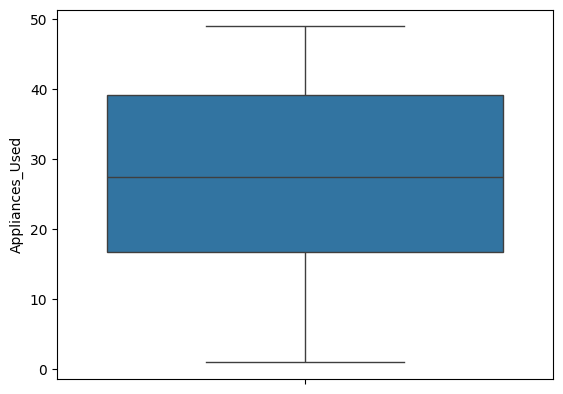

In [73]:
sns.boxplot(df['Appliances_Used'])

<Axes: ylabel='Average_Temperature'>

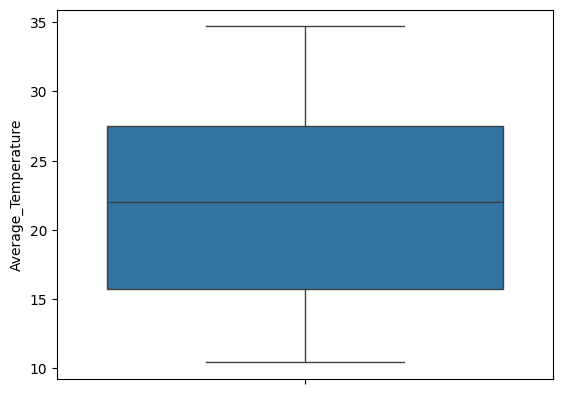

In [74]:
sns.boxplot(df['Average_Temperature'])

<Axes: ylabel='Number_of_Occupants'>

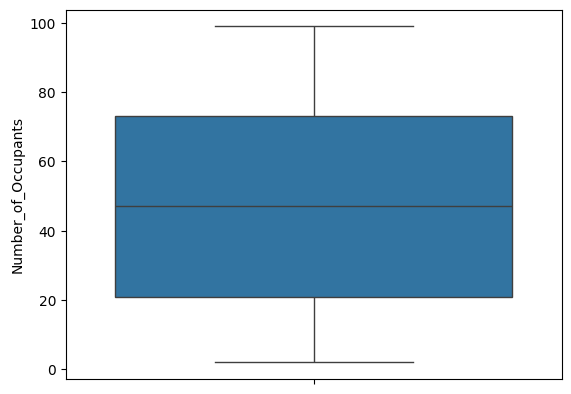

In [75]:
sns.boxplot(df['Number_of_Occupants'])

<Axes: ylabel='Square_Footage'>

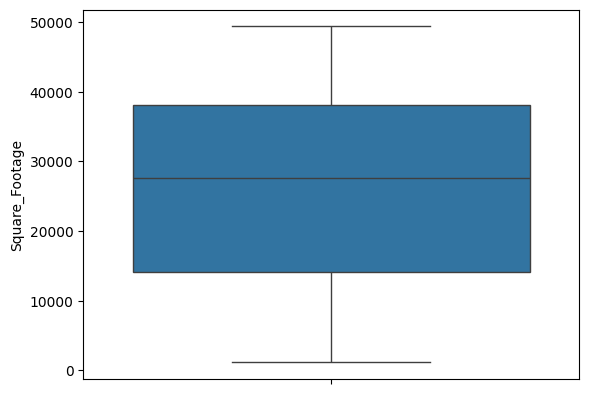

In [76]:
sns.boxplot(df['Square_Footage'])

In [77]:
df['Building_Type'].value_counts()

Building_Type
Residential    40
Industrial     34
Commercial     26
Name: count, dtype: int64

In [78]:
df = pd.get_dummies(df, columns=['Building_Type'], dtype=int)
df

,Square_Footage,Number_of_Occupants,Appliances_Used,Average_Temperature,Day_of_Week,Energy_Consumption,Building_Type_Commercial,Building_Type_Industrial,Building_Type_Residential
0,24563,15,4,28.52,1,2865.57,0,0,1
1,27583,56,23,23.07,0,4283.80,1,0,0
2,45313,4,44,33.56,1,5067.83,1,0,0
3,41625,84,17,27.39,0,4624.30,0,0,1
4,36720,58,47,17.08,1,4820.59,0,0,1
...,...,...,...,...,...,...,...,...,...
95,1161,81,11,15.45,0,3010.81,1,0,0
96,37943,50,23,21.73,0,4248.49,0,0,1
97,1558,27,29,16.86,0,2843.60,1,0,0
98,2145,56,12,11.77,0,3348.39,0,1,0


### Train Test Split

In [79]:
x = df.drop('Energy_Consumption', axis = 1)
y = df['Energy_Consumption']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=2)

### 1. Normalization

In [80]:
norm_scaler = MinMaxScaler()
train = norm_scaler.fit_transform(x_train)
train_df = pd.DataFrame(train, columns=x.columns)
train_df

,Square_Footage,Number_of_Occupants,Appliances_Used,Average_Temperature,Day_of_Week,Building_Type_Commercial,Building_Type_Industrial,Building_Type_Residential
0,0.448945,0.051546,0.916667,0.446730,0.0,1.0,0.0,0.0
1,0.106198,0.216495,0.833333,0.015220,0.0,0.0,1.0,0.0
2,0.629262,0.597938,0.041667,0.311394,1.0,0.0,0.0,1.0
3,0.736227,0.350515,0.645833,0.031674,0.0,0.0,0.0,1.0
4,0.530243,0.257732,0.937500,0.111477,1.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...
75,0.767331,0.907216,0.208333,0.380090,0.0,0.0,0.0,1.0
76,0.862532,0.185567,0.333333,0.062114,0.0,0.0,1.0,0.0
77,0.767331,1.000000,0.458333,0.170300,1.0,1.0,0.0,0.0
78,0.145166,0.082474,0.750000,0.640066,1.0,0.0,0.0,1.0


In [81]:
test = norm_scaler.transform(x_test)
test_Df = pd.DataFrame(test, columns=x.columns)
test_Df

,Square_Footage,Number_of_Occupants,Appliances_Used,Average_Temperature,Day_of_Week,Building_Type_Commercial,Building_Type_Industrial,Building_Type_Residential
0,0.952026,0.525773,0.645833,0.985603,1.0,0.0,1.0,0.0
1,0.550848,0.463918,0.479167,0.035376,0.0,0.0,1.0,0.0
2,0.176250,0.876289,0.250000,0.512546,0.0,0.0,0.0,1.0
3,0.863320,0.391753,0.562500,0.310160,0.0,0.0,1.0,0.0
4,0.539580,0.731959,0.500000,0.812423,1.0,0.0,1.0,0.0
5,0.352520,0.876289,0.520833,0.733854,0.0,0.0,1.0,0.0
6,0.916150,0.020619,0.895833,0.952694,1.0,1.0,0.0,0.0
7,0.894155,0.288660,0.083333,0.565200,0.0,1.0,0.0,0.0
8,0.548233,0.226804,0.479167,0.805841,1.0,1.0,0.0,0.0
9,0.581537,0.824742,0.791667,0.540518,1.0,1.0,0.0,0.0


### 2. Standardization

In [83]:
std_scaler = StandardScaler()
train = std_scaler.fit_transform(x_train)
train_df = pd.DataFrame(train, columns=x.columns)
train_df

,Square_Footage,Number_of_Occupants,Appliances_Used,Average_Temperature,Day_of_Week,Building_Type_Commercial,Building_Type_Industrial,Building_Type_Residential
0,-0.116561,-1.312206,1.216540,0.027083,-0.837931,1.791794,-0.713746,-0.859727
1,-1.312605,-0.764026,0.936473,-1.543632,-0.837931,-0.558100,1.401058,-0.859727
2,0.512668,0.503640,-1.724161,-0.465543,1.193416,-0.558100,-0.713746,1.163160
3,0.885934,-0.318630,0.306323,-1.483738,-0.837931,-0.558100,-0.713746,1.163160
4,0.167135,-0.626981,1.286557,-1.193253,1.193416,1.791794,-0.713746,-0.859727
...,...,...,...,...,...,...,...,...
75,0.994474,1.531478,-1.164027,-0.215487,-0.837931,-0.558100,-0.713746,1.163160
76,1.326685,-0.866810,-0.743927,-1.372934,-0.837931,-0.558100,1.401058,-0.859727
77,0.994474,1.839829,-0.323827,-0.979133,1.193416,1.791794,-0.713746,-0.859727
78,-1.176622,-1.209422,0.656406,0.730835,1.193416,-0.558100,-0.713746,1.163160


In [84]:
test = std_scaler.transform(x_test)
test_Df = pd.DataFrame(test, columns=x.columns)
test_Df

,Square_Footage,Number_of_Occupants,Appliances_Used,Average_Temperature,Day_of_Week,Building_Type_Commercial,Building_Type_Industrial,Building_Type_Residential
0,1.638982,0.263812,0.306323,1.988605,1.193416,-0.558100,1.401058,-0.859727
1,0.239037,0.058244,-0.253810,-1.470262,-0.837931,-0.558100,1.401058,-0.859727
2,-1.068154,1.428694,-1.023994,0.266658,-0.837931,-0.558100,-0.713746,1.163160
3,1.329436,-0.181585,0.026256,-0.470035,-0.837931,-0.558100,1.401058,-0.859727
4,0.199719,0.949036,-0.183794,1.358223,1.193416,-0.558100,1.401058,-0.859727
5,-0.453044,1.428694,-0.113777,1.072230,-0.837931,-0.558100,1.401058,-0.859727
6,1.513788,-1.414989,1.146523,1.868817,1.193416,1.791794,-0.713746,-0.859727
7,1.437035,-0.524197,-1.584128,0.458319,-0.837931,1.791794,-0.713746,-0.859727
8,0.229913,-0.729765,-0.253810,1.334265,1.193416,1.791794,-0.713746,-0.859727
9,0.346129,1.257388,0.796440,0.368478,1.193416,1.791794,-0.713746,-0.859727


### Model TRaining

In [86]:
knn_Reg = KNeighborsRegressor()
knn_Reg.fit(train_df, y_train)

KNeighborsRegressor()

In [87]:
def evaluation(string, model, ind_var, act):
    print(string.center(50, '*'))
    pred = model.predict(ind_var)
    
    mse = mean_squared_error(act, pred)
    print('MSE :', mse)
    
    rmse = np.sqrt(mse)
    print('RMSE :', rmse)
    
    mae = mean_absolute_error(act, pred)
    print('MAE :', mae)
    
    r2_val = r2_score(act, pred)
    print('R-Squared Value :', r2_val)
    
evaluation('Testing Data Evaluation', knn_Reg, test_Df, y_test)
print()
evaluation('Training Data Evaluation', knn_Reg, train_df, y_train)

*************Testing Data Evaluation**************
MSE : 292322.8519962
RMSE : 540.6688931279475
MAE : 424.15470000000005
R-Squared Value : 0.45449039562223914

*************Training Data Evaluation*************
MSE : 134045.64215624996
RMSE : 366.12244148133004
MAE : 297.0642749999999
R-Squared Value : 0.8037621358697215


### Hyperparamters Tuning

In [88]:
knn_model = KNeighborsRegressor()

param_grid = {'n_neighbors':np.arange(3, 20),'weights':['uniform', 'distance'], 'p':[1,2], 
              'algorithm':['auto', 'ball_tree', 'kd_tree', 'brute']}

rscv_knn_reg = RandomizedSearchCV(knn_model, param_grid, cv = 3, n_iter = 100)
rscv_knn_reg.fit(train_df, y_train)
rscv_knn_reg.best_estimator_

KNeighborsRegressor(n_neighbors=np.int64(4), weights='distance')

In [89]:
knn_Reg = rscv_knn_reg.best_estimator_
knn_Reg.fit(train_df, y_train)

KNeighborsRegressor(n_neighbors=np.int64(4), weights='distance')

In [90]:
evaluation('Testing Data Evaluation', knn_Reg, test_Df, y_test)
print()
evaluation('Training Data Evaluation', knn_Reg, train_df, y_train)

*************Testing Data Evaluation**************
MSE : 271011.29398446885
RMSE : 520.5874508518899
MAE : 387.8290889159539
R-Squared Value : 0.4942603263692349

*************Training Data Evaluation*************
MSE : 0.0
RMSE : 0.0
MAE : 0.0
R-Squared Value : 1.0


### Train on different K-values

In [91]:
train_acc_list = []
test_acc_list = []

for k in range(3,20):
#     for p in [1,2]:
#         print(f'k == {k}, p == {p}')
    knn_reg_model = KNeighborsRegressor(n_neighbors=k, p=1)
    knn_reg_model.fit(train_df, y_train)
    
    train_acc = knn_reg_model.score(train_df, y_train)
    train_acc_list.append(train_acc)
    
    test_acc = knn_reg_model.score(test_Df, y_test)
    test_acc_list.append(test_acc)

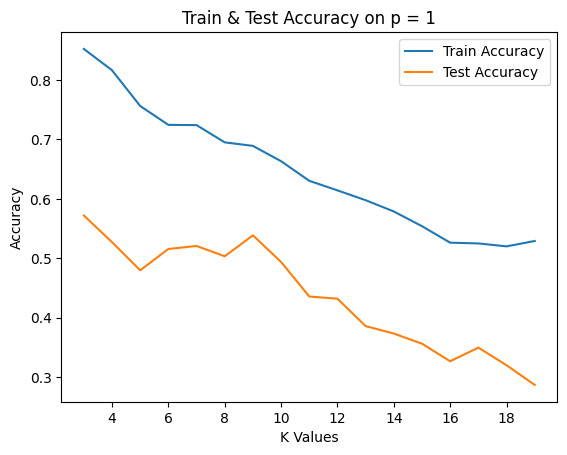

In [92]:
k = range(3,20)
plt.plot(k, train_acc_list, label='Train Accuracy')
plt.plot(k, test_acc_list, label='Test Accuracy')
plt.title('Train & Test Accuracy on p = 1')
plt.xlabel('K Values')
plt.ylabel('Accuracy')
plt.legend()

In [93]:
train_acc_list = []
test_acc_list = []

for k in range(3,20):
#     for p in [1,2]:
#         print(f'k == {k}, p == {p}')
    knn_reg_model = KNeighborsRegressor(n_neighbors=k, p=2)
    knn_reg_model.fit(train_df, y_train)
    
    train_acc = knn_reg_model.score(train_df, y_train)
    train_acc_list.append(train_acc)
    
    test_acc = knn_reg_model.score(test_Df, y_test)
    test_acc_list.append(test_acc)

Text(0, 0.5, 'Accuracy')

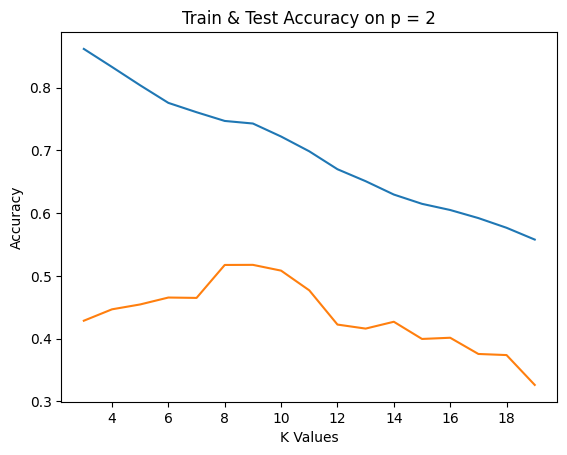

In [94]:
k = range(3,20)
plt.plot(k, train_acc_list, label='Train Accuracy')
plt.plot(k, test_acc_list, label='Test Accuracy')
plt.title('Train & Test Accuracy on p = 2')
plt.xlabel('K Values')
plt.ylabel('Accuracy')